## Validatie Mesh Quality

C:\Users\20192167\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


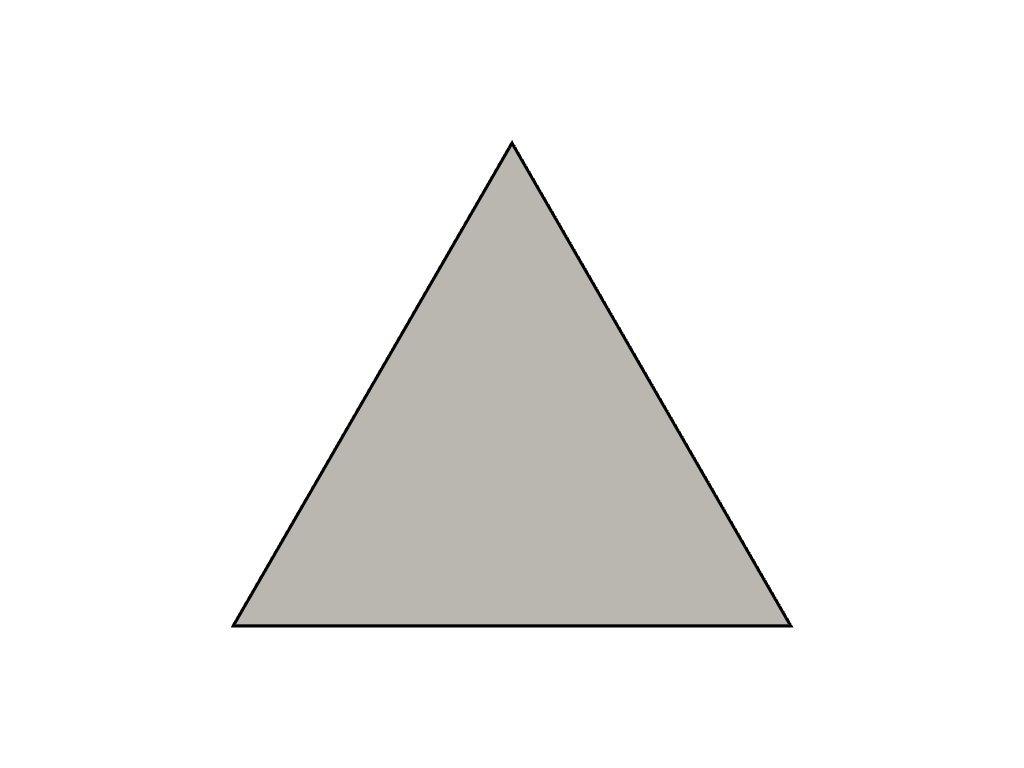

In [1]:
import numpy as np
import pyvista
import math

points = np.array([[0,0,0],
                   [2,0,0],
                   [1,math.sqrt(3),0]])
cells = [[3, 0, 1, 2]]
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [2]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0
aspect_ratio = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []

            
print('The average Aspect Ratio of the mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the mesh is', round(max(aspect_ratio),3))

The average Aspect Ratio of the mesh is 1.0
The minimum Aspect Ratio of the mesh is 1.0
the maximum Aspect Ratio of the mesh is 1.0


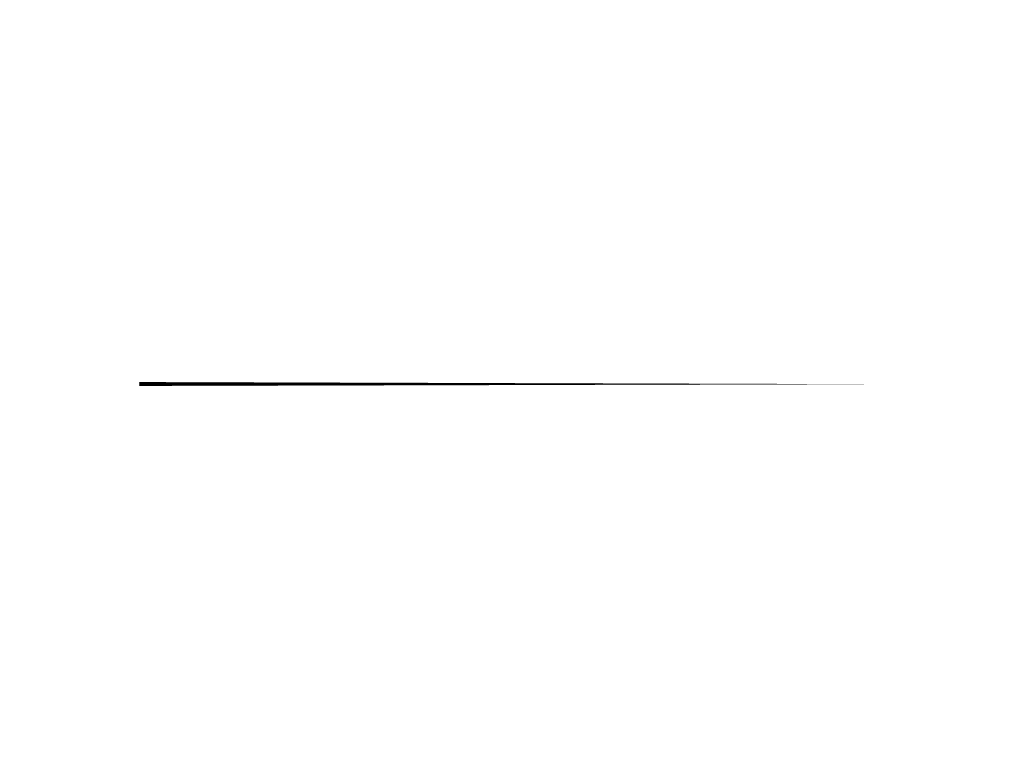

In [3]:
import numpy as np
import pyvista
import math

points = np.array([[0,0,0],
                   [2,0,0],
                   [0,0.001,0]])
cells = [[3, 0, 1, 2]]
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=10, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [4]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6
    
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A4= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

print('The average Face Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Face Orthogonality of the mesh is', round(max(Orthogonality),3)) 

The average Face Orthogonality of the mesh is 0.001
The minimum Face Orthogonality of the mesh is 0.001
the maximum Face Orthogonality of the mesh is 0.001


In [5]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0
aspect_ratio = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []

            
print('The average Aspect Ratio of the mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the mesh is', round(max(aspect_ratio),3))

The average Aspect Ratio of the mesh is 0.0
The minimum Aspect Ratio of the mesh is 0.0
the maximum Aspect Ratio of the mesh is 0.0


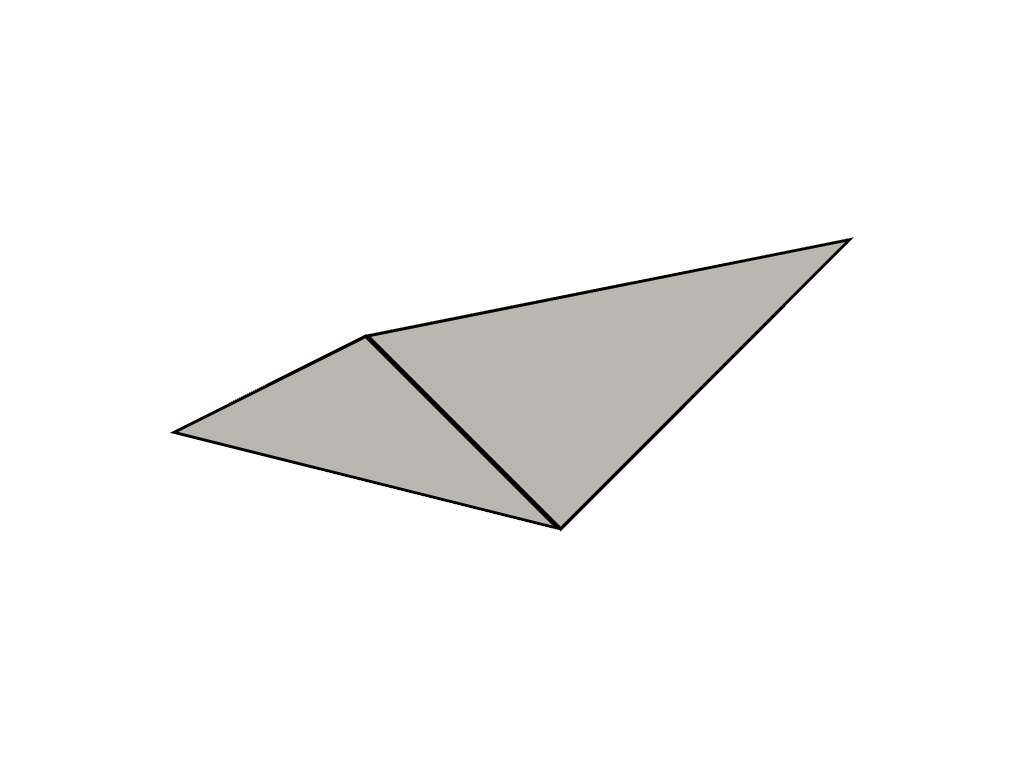

In [6]:
import numpy as np
import pyvista
import math

points = np.array([[0,0.5,0],
                   [2,0,0],
                   [1,1,0],
                   [3.5,1.5,0]])
cells = [[3, 0, 1, 2],
        [3,1,2,3 ]]
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [7]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6

#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
p = [] 
i = 0
center = []

if z1==3:
    for y in range(0,len_cells):
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                if z1==3: #if triangle
                    c = (p[0]+p[1]+p[2])/3
                    center.append(c)
                i=0
                p = []

if z1==4:
    for y in range(0,len_cells):
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                c = (p[0]+p[1]+p[2]+p[3])/4
                center.append(c)
                i=0
                p = []
#------------------------------------------#
#------Calculating the Orthogonality-------#
#------------------------------------------#

Orthogonality = []

for z in range (0,len_cells): 
    orth = []
    #-------------------------------------------------#
    #-------Determining the neighbouring cells--------#
    #-------------------------------------------------#
    if z1 ==3:
        d = cells[z][1]
        e = cells[z][2]
        f = cells[z][3]

        v1= points[e]-points[d]
        v2= points[f]-points[e]
        v3= points[d]-points[f]

        #v=(a,b) u=(b,-a) #perpendicular
        n1= (v1[1],-v1[0])#perpendicular to side de
        n2= (v2[1],-v2[0])#perpendicular to side ef
        n3= (v3[1],-v3[0])#perpendicular to side fd
        vectors_n=[n1,n2,n3]

        x=0
        while True:
            if x == len_cells:
                x=0
                break

            elif x <= len_cells:
                if d in cells[x][1:] and e in cells[x][1:]:
                    if x != z:
                        d1 = center[z]-center[x]
                        dot_d_n = (d1[0]*n1[0])+(d1[0]*n1[1])
                        magnitude_d = math.sqrt((d1[0])**2+(d1[1])**2)
                        magnitude_n = math.sqrt((n1[0])**2+(n1[1])**2)
                        ort = math.acos((dot_d_n)/(magnitude_d*magnitude_n))
                        orth.append(ort)
                        x = 0
                        break
            x=x+1

        while True:
            if x == len_cells:
                x=0
                break

            elif x<= len_cells:
                if e in cells[x][1:] and f in cells[x][1:]:
                    if x != z:
                        d2 = center[z]-center[x]
                        dot_d_n = (d2[0]*n2[0])+(d2[0]*n2[1])
                        magnitude_d = math.sqrt((d2[0])**2+(d2[1])**2)
                        magnitude_n = math.sqrt((n2[0])**2+(n2[1])**2)
                        ort = math.acos((dot_d_n)/(magnitude_d*magnitude_n))
                        orth.append(ort)
                        x = 0
                        break
            x=x+1

        while True:
            if x == len_cells:
                x = 0
                break

            elif x<= len_cells:
                if f in cells[x][1:] and d in cells[x][1:]:
                    if x != z:
                        d3 = center[z]-center[x]
                        dot_d_n = (d3[0]*n3[0])+(d3[0]*n3[1])
                        magnitude_d = math.sqrt((d3[0])**2+(d3[1])**2)
                        magnitude_n = math.sqrt((n3[0])**2+(n3[1])**2)
                        ort = math.acos((dot_d_n)/(magnitude_d*magnitude_n))
                        orth.append(ort)
                        x = 0
                        break 
            x=x+1  

            Orthogonality.append(min(orth))
            
    elif z1 ==4:
        d = cells[z][1]
        e = cells[z][2]
        f = cells[z][3]
        g = cells[z][4]

        v1= points[e]-points[d]
        v2= points[f]-points[e]
        v3= points[g]-points[f]
        v4= points[d]-points[g]

        #v=(a,b) u=(b,-a) #perpendicular
        n1= (v1[1],-v1[0])#perpendicular to side de
        n2= (v2[1],-v2[0])#perpendicular to side ef
        n3= (v3[1],-v3[0])#perpendicular to side fg
        n4= (v4[1],-v4[0])#perpendicular to side gd
        vectors_n=[n1,n2,n3,n4]

        x=0
        while True:
            if x == len_cells:
                x=0
                break

            elif x <= len_cells:
                if d in cells[x][1:] and e in cells[x][1:]:
                    if x != z:
                        d1 = center[z]-center[x]
                        dot_d_n = (d1[0]*n1[0])+(d1[0]*n1[1])
                        magnitude_d = math.sqrt((d1[0])**2+(d1[1])**2)
                        magnitude_n = math.sqrt((n1[0])**2+(n1[1])**2)
                        ort = math.acos((dot_d_n)/(magnitude_d*magnitude_n))
                        orth.append(ort)
                        x = 0
                        break
            x=x+1

        while True:
            if x == len_cells:
                x=0
                break

            elif x<= len_cells:
                if e in cells[x][1:] and f in cells[x][1:]:
                    if x != z:
                        d2 = center[z]-center[x]
                        dot_d_n = (d2[0]*n2[0])+(d2[0]*n2[1])
                        magnitude_d = math.sqrt((d2[0])**2+(d2[1])**2)
                        magnitude_n = math.sqrt((n2[0])**2+(n2[1])**2)
                        ort = math.acos((dot_d_n)/(magnitude_d*magnitude_n))
                        orth.append(ort)
                        x = 0
                        break
            x=x+1

        while True:
            if x == len_cells:
                x = 0
                break

            elif x<= len_cells:
                if f in cells[x][1:] and g in cells[x][1:]:
                    if x != z:
                        d3 = center[z]-center[x]
                        dot_d_n = (d3[0]*n3[0])+(d3[0]*n3[1])
                        magnitude_d = math.sqrt((d3[0])**2+(d3[1])**2)
                        magnitude_n = math.sqrt((n3[0])**2+(n3[1])**2)
                        ort = math.acos((dot_d_n)/(magnitude_d*magnitude_n))
                        orth.append(ort)
                        x = 0
                        break 
            x=x+1  
        
        while True:
            if x == len_cells:
                x = 0
                break

            elif x<= len_cells:
                if d in cells[x][1:] and g in cells[x][1:]:
                    if x != z:
                        d4 = center[z]-center[x]
                        dot_d_n = (d4[0]*n4[0])+(d4[0]*n4[1])
                        magnitude_d = math.sqrt((d4[0])**2+(d4[1])**2)
                        magnitude_n = math.sqrt((n4[0])**2+(n4[1])**2)
                        ort = math.acos((dot_d_n)/(magnitude_d*magnitude_n))
                        orth.append(ort)
                        x = 0
                        break 
            x=x+1  

            Orthogonality.append(max(orth))
print('The average Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Orthogonality of the mesh is', round(max(Orthogonality),3))

ValueError: math domain error

In [ ]:
import numpy as np
import pyvista
import math

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,math.sqrt(3),0],
                  [4,0,0],
                  [3,math.sqrt(3),0],
                  [1,-math.sqrt(3),0],
                  [3,-math.sqrt(3),0],
                  [6,0,0],
                  [5,math.sqrt(3),0],
                  [5,-math.sqrt(3),0],
                  [2,-2*math.sqrt(3),0],
                  [4,-2*math.sqrt(3),0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]


c = 5 #number of the cell you wish to refine
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]
cy=[d,e,f] #the numbers of the points creating the cell
g = len(points) #the total number of points in the mesh
i = len(cells) #the total number of cells in the mesh

#------Calculating the connectivity of the points---------------------------------------------------------------------#
connected_points = [] #the number of cells a single point is connected to
cp1 = 0

for y in range(0,g):
        if y == 3:
            for x in range(0,i):
                cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                cp1= cp1+cp #adding up the counting               
            connected_points.append(cp1-i) #removing the additional countings of the triangluarity of the cells
            cp1 = 0
            
        elif y != 3:
            for x in range(0,i):
                cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                cp1= cp1+cp #adding up the counting 
            connected_points.append(cp1)
            cp1 = 0

#------Calculating the connectivity of the cells----------------------------------------------------------------------#
connected_cells = [] #the number of cells a single cell is connected to

for y in range(0, i):
    a1 = connected_points[cells[y][1]]
    a2 = connected_points[cells[y][2]]
    a3 = connected_points[cells[y][3]]
    b = [a1,a2,a3] #an array containing the connectivity of the points of a specific cell
    c1 = b.count(2)
    c2 = b.count(3)
    c3 = b.count(6)
    if c1+c2 == 2: #if the cell is connected to two other cells
        cc = 2
        connected_cells.append(cc)
    elif c3 >= 2: #if the cell is connected to three other cells
        cc = 3
        connected_cells.append(cc)
    elif c1+c2+c3 == 1: #if the cell is connected to one other cells
        cc = 1
        connected_cells.append(cc)
        
#-----Splitting the cell in four--------------------------------------------------------------------------------------#  
point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side
points = np.vstack([points,point1,point2,point3]) #adding the points to the points array

g = len(points) #the new total number of points

#changing the original cell to to the refined cell
cells[c]= [3, (g-1),(g-2),f] 
cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])

#--------Finding the neighbouring cells-------------------------------------------------------------------------------#
y = [] #numbers of the neighbouring cells
v = 0

for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
    if d in cells[x][1:] and e in cells[x][1:]:
        y.append(x)
        v=1
if v!= 1:
    y.append(i+1) 

v=0
for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
    if e in cells[x][1:] and f in cells[x][1:]:
        y.append(x)
        v=1
if v!= 1:
    v=0 
    y.append(i+1)     

v=0
for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
    if d in cells[x][1:] and f in cells[x][1:]:
        y.append(x)
        v=1     
if v!= 1:
    v=0
    y.append(i+1)

#--------Determining which point the cells do not share---------------------------------------------------------------#
r =[]

for x in range (0,3):
    q = cells[y[x]][1:] #points in the neighbouring cell
    for x in range (0,3):
        q1 = q[x]
        if q1 in cy: #if two cells share a point
            t = 1
            r.append(t)
        else: # if two cells do not share a point
            t = 0
            r.append(t)

#---------Splitting the neighbouring cells---------------------------------------------------------------------------#
j = 0
h = 0
p = [] #a storange array for the following for loop
n = []
m = [] #an array containing the index numbers of the overlapping points

for x in range(0,len(r)+1):
    if j < 3: 
        a = r[x]
        p.append(a)
        j = j+1
    elif j == 3:  
        for z in range(0,3):
            z1=p[z]
            if z1==1:
                n.append(z)
                h=h+1
                if h == 2:
                    m.append(n[0])
                    m.append(n[1])
                    n = []
        h = 0 
        p = [] 
        n = []
        
        if x < 9:
            a = r[x]
            p.append(a)
        j=1
        h=0

n=3
j=0 

#Splitting the neigbouring cells in two
for z in range(0,3):
    u = y[z]
    if u <= i:
        d1 = cells[y[z]][1]
        e1 = cells[y[z]][2]
        f1 = cells[y[z]][3]
        cell = [3, d1, e1, f1]
        cell[m[j]+1] = g-n   
        cells[y[z]]= cell
        j=j+1
        cell = [3, d1, e1, f1]
        cell[m[j]+1] = g-n
        cells = np.vstack([cells, cell])  
        j=j+1
    n=n-1
    
#---------Plotting the new mesh--------------------------------------------------------------------------------------#
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [ ]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6
    
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A3= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

print('The average Face Orthogonality of the cell is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the cell is', round(min(Orthogonality),3))
print('the maximum Face Orthogonality of the cell is', round(max(Orthogonality),3))

In [ ]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6

#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
p = [] 
i = 0
center = []

if z1==3:
    for y in range(0,len_cells):
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                if z1==3: #if triangle
                    c = (p[0]+p[1]+p[2])/3
                    center.append(c)
                i=0
                p = []

if z1==4:
    for y in range(0,len_cells):
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                c = (p[0]+p[1]+p[2]+p[3])/4
                center.append(c)
                i=0
                p = []
#------------------------------------------#
#------Calculating the Orthogonality-------#
#------------------------------------------#

Orthogonality = []

for z in range (0,len_cells): 
    orth = []
    #-------------------------------------------------#
    #-------Determining the neighbouring cells--------#
    #-------------------------------------------------#
    if z1 ==3:
        d = cells[z][1]
        e = cells[z][2]
        f = cells[z][3]

        v1= points[e]-points[d]
        v2= points[f]-points[e]
        v3= points[d]-points[f]

        #v=(a,b) u=(b,-a) #perpendicular
        n1= (v1[1],-v1[0])#perpendicular to side de
        n2= (v2[1],-v2[0])#perpendicular to side ef
        n3= (v3[1],-v3[0])#perpendicular to side fd
        vectors_n=[n1,n2,n3]

        x=0
        while True:
            if x == len_cells:
                x=0
                break

            elif x <= len_cells:
                if d in cells[x][1:] and e in cells[x][1:]:
                    if x != z:
                        d1 = (center[z]-center[x])[:2]
                        dot_d_n = abs((d1[0]*n1[0])+(d1[0]*n1[1]))
                        magnitude_d = math.sqrt((d1[0])**2+(d1[1])**2)
                        magnitude_n = math.sqrt((n1[0])**2+(n1[1])**2)
                        ort = (dot_d_n)/(magnitude_d*magnitude_n)
                        orth.append(ort)
                        x = 0
                        break
            x=x+1

        while True:
            if x == len_cells:
                x=0
                break

            elif x<= len_cells:
                if e in cells[x][1:] and f in cells[x][1:]:
                    if x != z:
                        d2 = center[z]-center[x]
                        dot_d_n = abs((d2[0]*n2[0])+(d2[0]*n2[1]))
                        magnitude_d = math.sqrt((d2[0])**2+(d2[1])**2)
                        magnitude_n = math.sqrt((n2[0])**2+(n2[1])**2)
                        ort = (dot_d_n)/(magnitude_d*magnitude_n)
                        orth.append(ort)
                        x = 0
                        break
            x=x+1

        while True:
            if x == len_cells:
                x = 0
                break

            elif x<= len_cells:
                if f in cells[x][1:] and d in cells[x][1:]:
                    if x != z:
                        d3 = center[z]-center[x]
                        dot_d_n = abs((d3[0]*n3[0])+(d3[0]*n3[1]))
                        magnitude_d = math.sqrt((d3[0])**2+(d3[1])**2)
                        magnitude_n = math.sqrt((n3[0])**2+(n3[1])**2)
                        ort = (dot_d_n)/(magnitude_d*magnitude_n)
                        orth.append(ort)
                        x = 0
                        break 
            x=x+1  

            Orthogonality.append(max(orth))
        print(z, orth)    
    elif z1 ==4:
        d = cells[z][1]
        e = cells[z][2]
        f = cells[z][3]
        g = cells[z][4]

        v1= points[e]-points[d]
        v2= points[f]-points[e]
        v3= points[g]-points[f]
        v4= points[d]-points[g]

        #v=(a,b) u=(b,-a) #perpendicular
        n1= (v1[1],-v1[0])#perpendicular to side de
        n2= (v2[1],-v2[0])#perpendicular to side ef
        n3= (v3[1],-v3[0])#perpendicular to side fg
        n4= (v4[1],-v4[0])#perpendicular to side gd
        vectors_n=[n1,n2,n3,n4]

        x=0
        while True:
            if x == len_cells:
                x=0
                break

            elif x <= len_cells:
                if d in cells[x][1:] and e in cells[x][1:]:
                    if x != z:
                        d1 = center[z]-center[x]
                        dot_d_n = abs((d1[0]*n1[0])+(d1[0]*n1[1]))
                        magnitude_d = math.sqrt((d1[0])**2+(d1[1])**2)
                        magnitude_n = math.sqrt((n1[0])**2+(n1[1])**2)
                        ort = (dot_d_n)/(magnitude_d*magnitude_n)
                        orth.append(ort)
                        x = 0
                        break
            x=x+1

        while True:
            if x == len_cells:
                x=0
                break

            elif x<= len_cells:
                if e in cells[x][1:] and f in cells[x][1:]:
                    if x != z:
                        d2 = center[z]-center[x]
                        dot_d_n = abs((d2[0]*n2[0])+(d2[0]*n2[1]))
                        magnitude_d = math.sqrt((d2[0])**2+(d2[1])**2)
                        magnitude_n = math.sqrt((n2[0])**2+(n2[1])**2)
                        ort = (dot_d_n)/(magnitude_d*magnitude_n)
                        orth.append(ort)
                        x = 0
                        break
            x=x+1

        while True:
            if x == len_cells:
                x = 0
                break

            elif x<= len_cells:
                if f in cells[x][1:] and g in cells[x][1:]:
                    if x != z:
                        d3 = center[z]-center[x]
                        dot_d_n = abs((d3[0]*n3[0])+(d3[0]*n3[1]))
                        magnitude_d = math.sqrt((d3[0])**2+(d3[1])**2)
                        magnitude_n = math.sqrt((n3[0])**2+(n3[1])**2)
                        ort = (dot_d_n)/(magnitude_d*magnitude_n)
                        orth.append(ort)
                        x = 0
                        break 
            x=x+1  
        
        while True:
            if x == len_cells:
                x = 0
                break

            elif x<= len_cells:
                if d in cells[x][1:] and g in cells[x][1:]:
                    if x != z:
                        d4 = center[z]-center[x]
                        dot_d_n = abs((d4[0]*n4[0])+(d4[0]*n4[1]))
                        magnitude_d = math.sqrt((d4[0])**2+(d4[1])**2)
                        magnitude_n = math.sqrt((n4[0])**2+(n4[1])**2)
                        ort = (dot_d_n)/(magnitude_d*magnitude_n)
                        orth.append(ort)
                        x = 0
                        break 
            x=x+1  
            
            Orthogonality.append(max(orth))
print('The average Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Orthogonality of the mesh is', round(max(Orthogonality),3))

In [ ]:
points1 = np.vstack([points, center])

mesh = pyvista.PolyData(points1, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
pl.add_point_labels(points1, [f'Point {i}' for i in range(34)],always_visible=True,
                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [ ]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                     [1,0,0],
                     [1,1,0],
                     [0,1,0],
                     [2,1,0],
                     [2,0,0],
                     [0,2,0],
                     [1,2,0],
                     [2,2,0],
                     [0,3,0],
                     [1,3,0],
                     [2,3,0],
                     [3,0,0],
                     [3,1,0],
                     [3,2,0],
                     [3,3,0]])

# mesh faces
cells = ([[4, 0,1,2,3],
        [4, 1,5,4,2],
        [4, 2,7,6,3],
        [4, 2,4,8,7],
        [4, 6,7,10,9],
        [4, 7,8,11,10],
        [4, 8,14,15,11],
        [4, 4, 13,14,8],
        [4, 5,12,13,4]]) 

c = 3 #number of the cell you wish to refine
d1 = cells[c][1]
d2 = cells[c][2]
d3 = cells[c][3]
d4 = cells[c][4]

#Adding the additional points
point1 = ((points[d3]+2*points[d1])/3) 
point2 = ((2*points[d3]+points[d1])/3)
point3 = ((points[d2]+2*points[d4])/3)
point4 = (((2*points[d2])+points[d4])/3)
points = np.vstack([points,point1,point2,point3,point4])

g = len(points) #total number of points in the mesh

#Altering the mesh 
cells[c]= [4, d1,d2,(g-1),(g-4)]
cells = np.vstack([cells, [4, (g-1),d2,d3,(g-3)]])
cells = np.vstack([cells, [4, (g-2),(g-3),d3,d4]])
cells = np.vstack([cells, [4, d1,(g-4),(g-2),d4]])
cells = np.vstack([cells, [4, (g-4),(g-2),(g-3),(g-1)]])

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [ ]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6

#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
p = [] 
i = 0
center = []

if z1==3:
    for y in range(0,len_cells):
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                if z1==3: #if triangle
                    c = (p[0]+p[1]+p[2])/3
                    center.append(c)
                i=0
                p = []

if z1==4:
    for y in range(0,len_cells):
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                c = (p[0]+p[1]+p[2]+p[3])/4
                center.append(c)
                i=0
                p = []
#------------------------------------------#
#------Calculating the Orthogonality-------#
#------------------------------------------#

Orthogonality = []

for z in range (0,len_cells): 
    orth = []
    #-------------------------------------------------#
    #-------Determining the neighbouring cells--------#
    #-------------------------------------------------#
    if z1 ==3:
        d = cells[z][1]
        e = cells[z][2]
        f = cells[z][3]

        v1= points[e]-points[d]
        v2= points[f]-points[e]
        v3= points[d]-points[f]

        #v=(a,b) u=(b,-a) #perpendicular
        n1= (v1[1],-v1[0])#perpendicular to side de
        n2= (v2[1],-v2[0])#perpendicular to side ef
        n3= (v3[1],-v3[0])#perpendicular to side fd
        vectors_n=[n1,n2,n3]

        x=0
        while True:
            if x == len_cells:
                x=0
                break

            elif x <= len_cells:
                if d in cells[x][1:] and e in cells[x][1:]:
                    if x != z:
                        d1 = center[z]-center[x]
                        dot_d_n = abs((d1[0]*n1[0])+(d1[0]*n1[1]))
                        magnitude_d = math.sqrt((d1[0])**2+(d1[1])**2)
                        magnitude_n = math.sqrt((n1[0])**2+(n1[1])**2)
                        ort = (dot_d_n)/(magnitude_d*magnitude_n)
                        orth.append(ort)
                        x = 0
                        break
            x=x+1

        while True:
            if x == len_cells:
                x=0
                break

            elif x<= len_cells:
                if e in cells[x][1:] and f in cells[x][1:]:
                    if x != z:
                        d2 = center[z]-center[x]
                        dot_d_n = abs((d2[0]*n2[0])+(d2[0]*n2[1]))
                        magnitude_d = math.sqrt((d2[0])**2+(d2[1])**2)
                        magnitude_n = math.sqrt((n2[0])**2+(n2[1])**2)
                        ort = (dot_d_n)/(magnitude_d*magnitude_n)
                        orth.append(ort)
                        x = 0
                        break
            x=x+1

        while True:
            if x == len_cells:
                x = 0
                break

            elif x<= len_cells:
                if f in cells[x][1:] and d in cells[x][1:]:
                    if x != z:
                        d3 = center[z]-center[x]
                        dot_d_n = abs((d3[0]*n3[0])+(d3[0]*n3[1]))
                        magnitude_d = math.sqrt((d3[0])**2+(d3[1])**2)
                        magnitude_n = math.sqrt((n3[0])**2+(n3[1])**2)
                        ort = (dot_d_n)/(magnitude_d*magnitude_n)
                        orth.append(ort)
                        x = 0
                        break 
            x=x+1  

            Orthogonality.append(max(orth))
            
    elif z1 ==4:
        d = cells[z][1]
        e = cells[z][2]
        f = cells[z][3]
        g = cells[z][4]

        v1= points[e]-points[d]
        v2= points[f]-points[e]
        v3= points[g]-points[f]
        v4= points[d]-points[g]

        #v=(a,b) u=(b,-a) #perpendicular
        n1= (v1[1],-v1[0])#perpendicular to side de
        n2= (v2[1],-v2[0])#perpendicular to side ef
        n3= (v3[1],-v3[0])#perpendicular to side fg
        n4= (v4[1],-v4[0])#perpendicular to side gd
        vectors_n=[n1,n2,n3,n4]

        x=0
        while True:
            if x == len_cells:
                x=0
                break

            elif x <= len_cells:
                if d in cells[x][1:] and e in cells[x][1:]:
                    if x != z:
                        d1 = center[z]-center[x]
                        dot_d_n = abs((d1[0]*n1[0])+(d1[0]*n1[1]))
                        magnitude_d = math.sqrt((d1[0])**2+(d1[1])**2)
                        magnitude_n = math.sqrt((n1[0])**2+(n1[1])**2)
                        ort = (dot_d_n)/(magnitude_d*magnitude_n)
                        orth.append(ort)
                        x = 0
                        break
            x=x+1

        while True:
            if x == len_cells:
                x=0
                break

            elif x<= len_cells:
                if e in cells[x][1:] and f in cells[x][1:]:
                    if x != z:
                        d2 = center[z]-center[x]
                        dot_d_n = abs((d2[0]*n2[0])+(d2[0]*n2[1]))
                        magnitude_d = math.sqrt((d2[0])**2+(d2[1])**2)
                        magnitude_n = math.sqrt((n2[0])**2+(n2[1])**2)
                        ort = (dot_d_n)/(magnitude_d*magnitude_n)
                        orth.append(ort)
                        x = 0
                        break
            x=x+1

        while True:
            if x == len_cells:
                x = 0
                break

            elif x<= len_cells:
                if f in cells[x][1:] and g in cells[x][1:]:
                    if x != z:
                        d3 = center[z]-center[x]
                        dot_d_n = abs((d3[0]*n3[0])+(d3[0]*n3[1]))
                        magnitude_d = math.sqrt((d3[0])**2+(d3[1])**2)
                        magnitude_n = math.sqrt((n3[0])**2+(n3[1])**2)
                        ort = (dot_d_n)/(magnitude_d*magnitude_n)
                        orth.append(ort)
                        x = 0
                        break 
            x=x+1  
        
        while True:
            if x == len_cells:
                x = 0
                break

            elif x<= len_cells:
                if d in cells[x][1:] and g in cells[x][1:]:
                    if x != z:
                        d4 = center[z]-center[x]
                        dot_d_n = abs((d4[0]*n4[0])+(d4[0]*n4[1]))
                        magnitude_d = math.sqrt((d4[0])**2+(d4[1])**2)
                        magnitude_n = math.sqrt((n4[0])**2+(n4[1])**2)
                        ort = (dot_d_n)/(magnitude_d*magnitude_n)
                        orth.append(ort)
                        x = 0
                        break 
            x=x+1  

            Orthogonality.append(max(orth))
print('The average Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Orthogonality of the mesh is', round(max(Orthogonality),3))